In [393]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [394]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [404]:
from datasets.nuscenes import *
from models.evidential import *

from tools.utils import *
from tools.loss import *

%matplotlib inline
import matplotlib.pyplot as plt

In [405]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
nusc_data = NuScenesDataset(nusc, False)
model = Evidential([7], backbone="lss")
# model.load(torch.load("../outputs/nuscenes/lss_baseline_focal_n0.5/4.pt"))

Loaded pretrained weights for efficientnet-b0


In [406]:
images, intrinsics, extrinsics, labels = nusc_data[0]
images = images[None].to(7)
intrinsics = intrinsics[None].to(7)
extrinsics = extrinsics[None].to(7)
labels = labels[None].to(7)

In [437]:
alpha = model(images, intrinsics, extrinsics) 
preds = model.activate(logits)
torch.tensor([3., 1., 3., 1.]).to(7)

tensor([3., 1., 3., 1.], device='cuda:7')

In [440]:
u_focal_loss_log(alpha, labels, n=2, weights=torch.tensor([3., 3., 3., 3.]).to(7)).mean()

tensor(0., device='cuda:7', dtype=torch.float64)

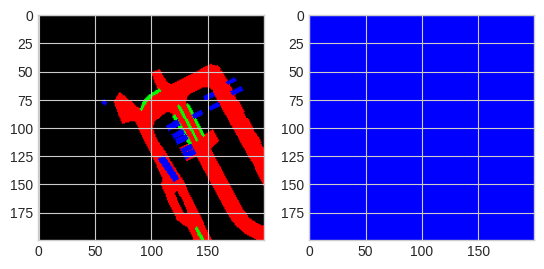

In [389]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(map_rgb(labels[0]) / 255)
axs[1].imshow(map_rgb(preds[0]) / 255)

In [392]:
torch.softmax(torch.tensor([10., -10., -10., -10.]), dim=0)

tensor([1.0000e+00, 2.0612e-09, 2.0612e-09, 2.0612e-09])